Vamos tentar responder a seguinte pergunta: Quais variaveis são uteis para determinar um consumo de um carro?

In [ ]:
#carregar os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Configuração para o Seaborn
sns.set_style('whitegrid')

In [ ]:
#link com os dados do mtcars

df = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")

In [ ]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


mpg -	Miles/(US) gallon

cyl	- Number of cylinders

disp - 	Displacement (cu.in.)

hp -	Gross horsepower

drat -	Rear axle ratio

wt -	Weight (1000 lbs)

qsec	- 1/4 mile time

vs	- Engine (0 = V-shaped, 1 = straight)

am	- Transmission (0 = automatic, 1 = manual)

gear	- Number of forward gears

carb	- Number of carburetors

Para fins didaticos vamos alterar os nomes de algumas colunas.

In [ ]:

# transforma milhas por galao para km/litros
df['mpg'] = df['mpg'] * 0.425

# transforma polegadas cubicas para litros
df['disp'] = df['disp'] * 0.0163871

# transforma peso em libras para quilogramas
df['wt'] = df['wt'] * 0.453592


# Substitui os nomes das colunas
df = df.rename(columns={
    'mpg': 'consumo',
    'disp': 'cilindradas',
    'wt': 'peso',
    'drap': 'relacao'

})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumo      32 non-null     float64
 1   cyl          32 non-null     int64  
 2   cilindradas  32 non-null     float64
 3   hp           32 non-null     int64  
 4   drat         32 non-null     float64
 5   peso         32 non-null     float64
 6   qsec         32 non-null     float64
 7   vs           32 non-null     int64  
 8   am           32 non-null     int64  
 9   gear         32 non-null     int64  
 10  carb         32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [ ]:
# remover coluna do modelo
df = df.drop('model', axis=1)

In [ ]:
#pacote necessario para aplicar a funcação skim

#!pip install skimpy

from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32     │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0       ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ consumo        │   0 │     0 │    8.539 │    2.561 │     4.42 │  6.556 │   8.16 │   9.69 │  14.41 │ ▃▇▇▃▁▃ │  │
│ │ cyl            │   0 │     0 │    6.188 │    1.786 │        4 │      4 │      6 │      8 │      8 │ ▆  ▅ ▇ │  │
│ │ cilindradas    │   0 │     0 │    3.781 │    2.031 │    1.165 │   1.98 │  3.217 │  5.342 │  7.735 │ ▇▆▂▅▅▃ │  │
│ │ hp             │   0 │     0 │    146.7 │    68.56 │       52 │   96.5 │    123 │    180 │    335 │ ▇▇▇▃▃▁ │  │
│ │ drat           │   0 │     0 │    3.597 │   0.5347 │     2.76 │   3.08 │  3.695 │   3.92 │   4.93 │ ▇▃▅▇▃▁ │  │
│ │ peso           │   0 │     0 │    1.459 │   0.4438 │   0.6863 │  1.171 │  1.508 │  1.637 │   2.46 │ ▃▅▇▆ ▂ │  │
│ │ qsec           │   0 │     0 │    17.85 │    1.787 │     14.5 │  16.89 │  17.71 │   18.9 │   22.9 │ ▃▅▇▅▁▁ │  │
│ │ vs             │   0 │     0 │   0.4375 │    0.504 │        0 │      0 │      0 │      1 │      1 │ ▇    ▆ │  │
│ │ am             │   0 │     0 │   0.4062 │    0.499 │        0 │      0 │      0 │      1 │      1 │ ▇    ▅ │  │
│ │ gear           │   0 │     0 │    3.688 │   0.7378 │        3 │      3 │      4 │      4 │      5 │ ▇  ▆ ▃ │  │
│ │ carb           │   0 │     0 │    2.812 │    1.615 │        1 │      2 │      2 │      4 │      8 │  ▇▁▅   │  │
│ └────────────────┴─────┴───────┴──────────┴──────────┴──────────┴────────┴────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# vamos dar uma incrementada na função 'describe'
def full_summary(df):
    # usar describe para gerar estatísticas básicas

    summary = df.describe().T # transposta

    # selecionar apenas as colunas numéricas para os cálculos

    numeric_cols = df.select_dtypes(include=['number']).columns


    summary['IQR'] =  df[numeric_cols].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

    # adicionar skewness (assimetria)
    summary['skewness'] = df[numeric_cols].apply(lambda x: skew(x.dropna()))

    # adicionar kurtosis (curtose)
    summary['kurtosis'] = df[numeric_cols].apply(lambda x: kurtosis(x.dropna()))

    return summary

# Exibir o resumo
full_summary(df)

,count,mean,std,min,25%,50%,75%,max,IQR,skewness,kurtosis
consumo,32.0,8.538516,2.561453,4.420000,6.555625,8.160000,9.690000,14.407500,3.134375,0.640440,-0.200533
cyl,32.0,6.187500,1.785922,4.000000,4.000000,6.000000,8.000000,8.000000,4.000000,-0.183129,-1.680968
cilindradas,32.0,3.780862,2.030996,1.165123,1.979971,3.216788,5.342195,7.734711,3.362223,0.400272,-1.089683
hp,32.0,146.687500,68.562868,52.000000,96.500000,123.000000,180.000000,335.000000,83.500000,0.761436,0.052233
drat,32.0,3.596563,0.534679,2.760000,3.080000,3.695000,3.920000,4.930000,0.840000,0.278873,-0.564884
peso,32.0,1.459319,0.443820,0.686285,1.170834,1.508193,1.637467,2.460283,0.466633,0.443786,0.172471
qsec,32.0,17.848750,1.786943,14.500000,16.892500,17.710000,18.900000,22.900000,2.007500,0.387046,0.553753
vs,32.0,0.437500,0.504016,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.251976,-1.936508
am,32.0,0.406250,0.498991,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.381771,-1.854251
gear,32.0,3.687500,0.737804,3.000000,3.000000,4.000000,4.000000,5.000000,1.000000,0.554649,-0.943210


Os dados não apreentam uma simetria muito intensa, para verificar a sua normalidade, podemos suar alguns testes estatisticos.


In [ ]:
from scipy import stats

# Loop pelas colunas numéricas do DataFrame
for column in df.select_dtypes(include=np.number).columns:
    shapiro_test = stats.shapiro(df[column])
    print(f"Teste de Shapiro-Wilk para '{column}':")
    if shapiro_test.pvalue < 0.05:
        print("Distribuição não normal")
    else:
        print("Distribuição normal")
    print(f"Valor-p: {shapiro_test.pvalue:.4f}")  # Formatar o valor-p para 4 casas decimais
    print("-" * 20)


# Interpretação dos resultados:
# Se o valor-p for menor que 0.05, rejeitamos a hipótese nula de que os dados são normalmente distribuídos.
# Se o valor-p for maior que 0.05, não rejeitamos a hipótese nula.

Teste de Shapiro-Wilk para 'consumo':
Distribuição normal
Valor-p: 0.1229
--------------------
Teste de Shapiro-Wilk para 'cyl':
Distribuição não normal
Valor-p: 0.0000
--------------------
Teste de Shapiro-Wilk para 'cilindradas':
Distribuição não normal
Valor-p: 0.0208
--------------------
Teste de Shapiro-Wilk para 'hp':
Distribuição não normal
Valor-p: 0.0488
--------------------
Teste de Shapiro-Wilk para 'drat':
Distribuição normal
Valor-p: 0.1101
--------------------
Teste de Shapiro-Wilk para 'peso':
Distribuição normal
Valor-p: 0.0927
--------------------
Teste de Shapiro-Wilk para 'qsec':
Distribuição normal
Valor-p: 0.5935
--------------------
Teste de Shapiro-Wilk para 'vs':
Distribuição não normal
Valor-p: 0.0000
--------------------
Teste de Shapiro-Wilk para 'am':
Distribuição não normal
Valor-p: 0.0000
--------------------
Teste de Shapiro-Wilk para 'gear':
Distribuição não normal
Valor-p: 0.0000
--------------------
Teste de Shapiro-Wilk para 'carb':
Distribuição não n

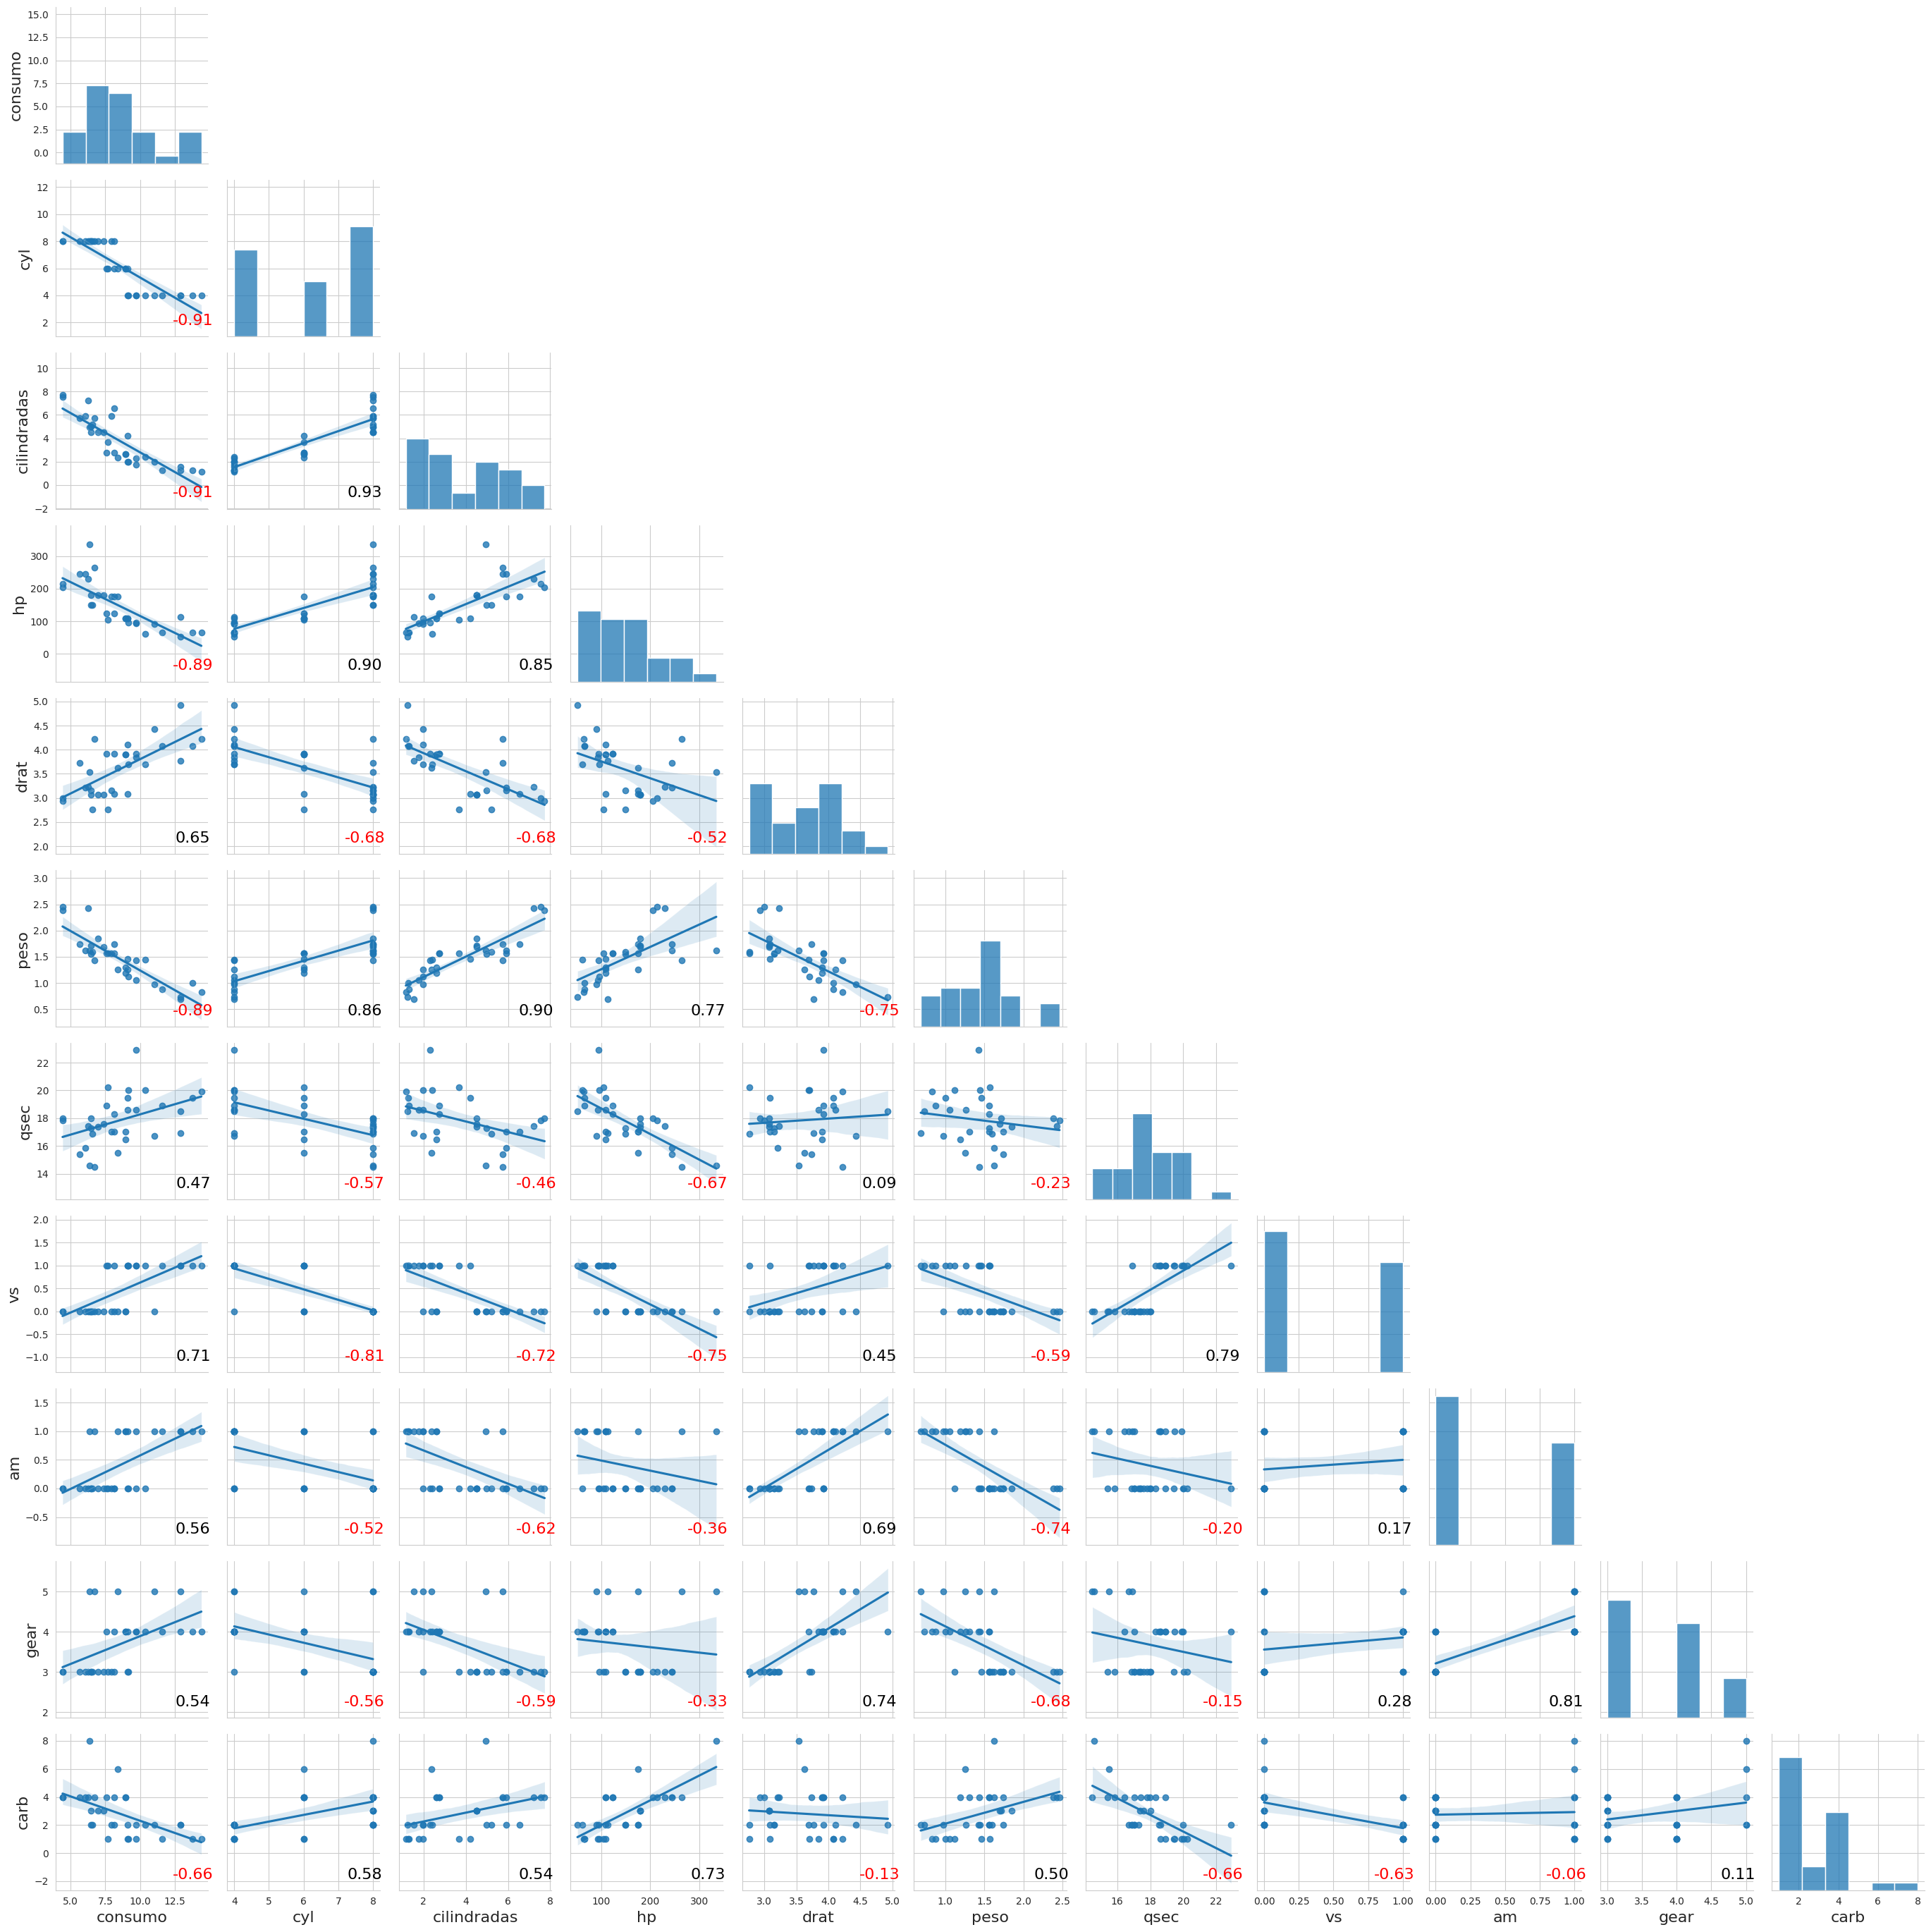

In [ ]:
# Calcular a matriz de correlação usando o método de Spearman (não parametrico) ou pearson (Parametrico)
corr = df.corr(method='spearman')

# Criar o pairplot para variáveis numéricas
g = sns.pairplot(df, kind='reg', diag_kind='hist')

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)  # Aumentar fonte do eixo X
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

# Adicionar os valores de correlação nos gráficos superiores
for i in range(len(g.axes)):
    for j in range(i+1, len(g.axes)):
    # Esconder os gráficos superiores
      g.axes[i, j].set_visible(False)

    # Calcular a cor baseada na correlação (azul positivo, vermelho negativo)
      color = 'red' if corr.iloc[i, j] < 0 else 'black'

    # Adicionar o valor de correlação
      g.axes[j, i].annotate(f'{corr.iloc[i, j]:.2f}',
                          xy=(0.9, 0.1), xycoords='axes fraction',
                          ha='center', va='center', fontsize=16, color=color)

# Ajustar a plotagem e exibir o gráfico
plt.tight_layout()
plt.show()

Vamos observar separamente cada relação.

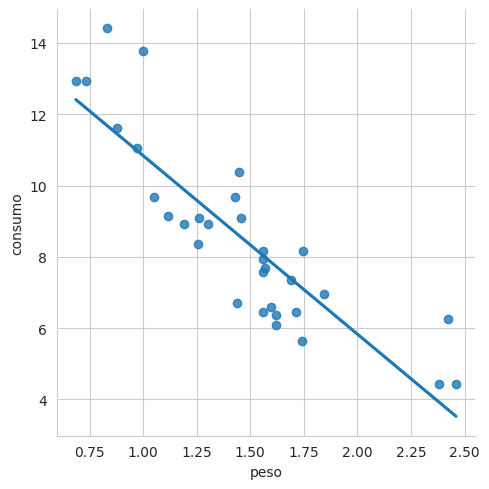

In [ ]:
# regressão linear entre peso e consumo
sns.lmplot(x='peso', y='consumo', data=df, ci=None)

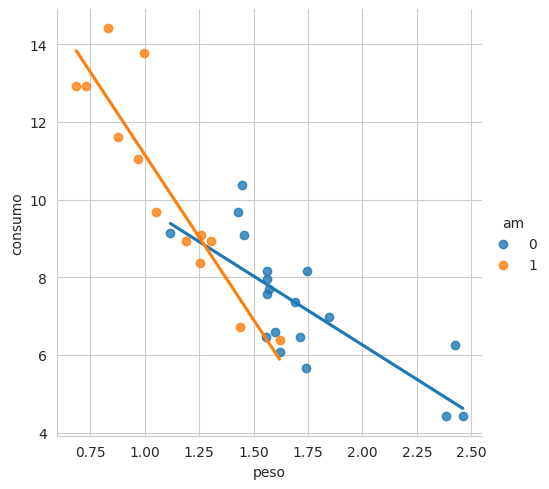

In [ ]:
# vamos ver se não caimos no Paradoxo de Simpson
sns.lmplot(x='peso', y='consumo',hue='am', data=df, ci=None)

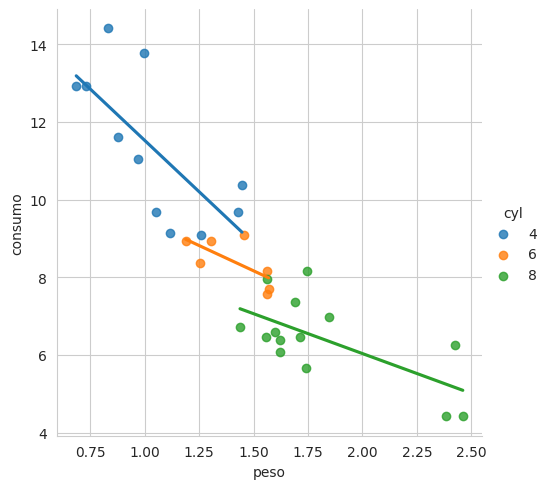

In [ ]:
sns.lmplot(x='peso', y='consumo',hue='cyl', data=df, ci=None)

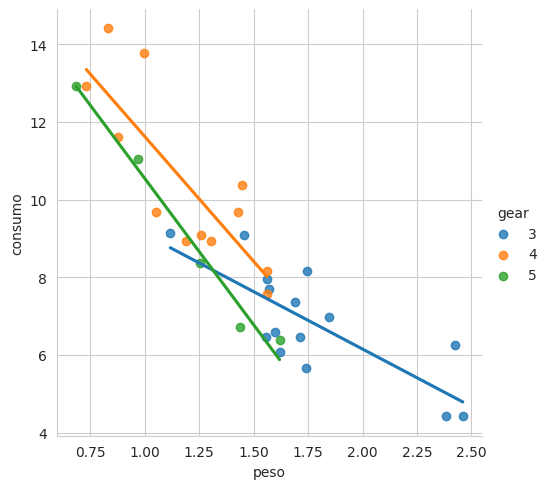

In [ ]:
sns.lmplot(x='peso', y='consumo',hue='gear', data=df, ci=None)

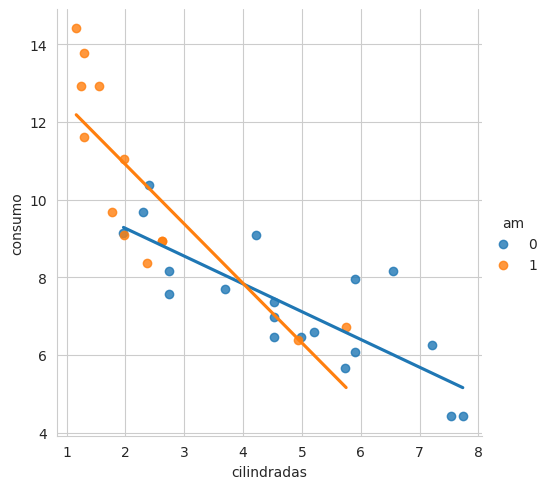

In [ ]:
sns.lmplot(x='cilindradas', y='consumo',hue='am', data=df, ci=None)

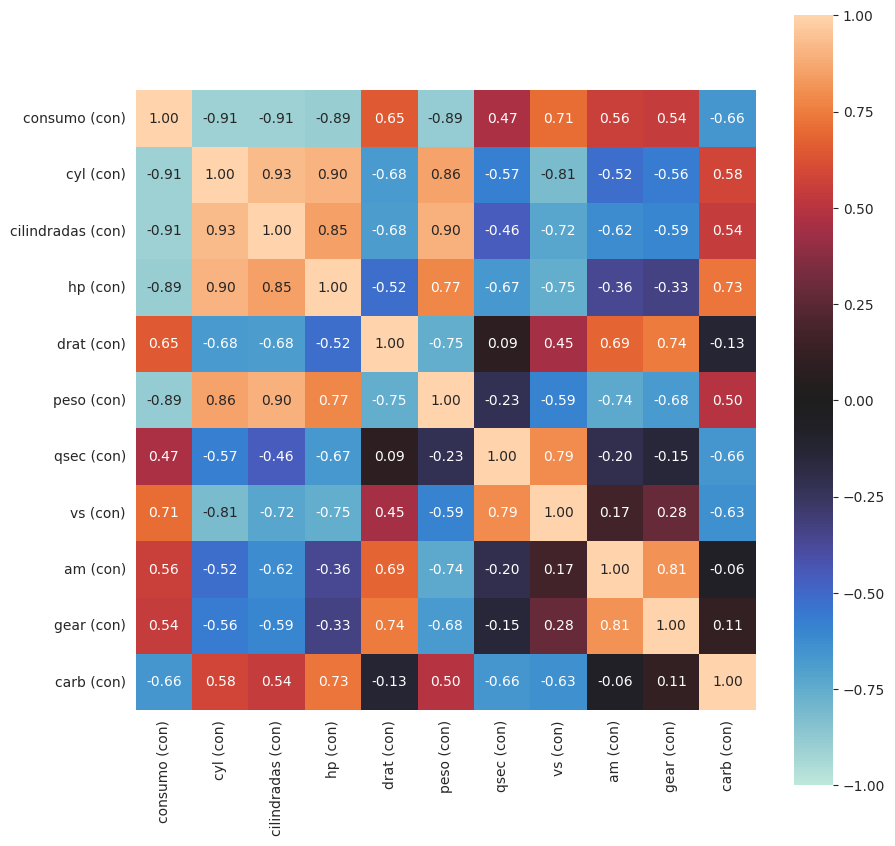

{'corr':                    consumo (con)  cyl (con)  cilindradas (con)  hp (con)  \
consumo (con)           1.000000  -0.910801          -0.908882 -0.894665   
cyl (con)              -0.910801   1.000000           0.927652  0.901791   
cilindradas (con)      -0.908882   0.927652           1.000000  0.851043   
hp (con)               -0.894665   0.901791           0.851043  1.000000   
drat (con)              0.651455  -0.678881          -0.683592 -0.520125   
peso (con)             -0.886422   0.857728           0.897706  0.774677   
qsec (con)              0.466936  -0.572351          -0.459782 -0.666606   
vs (con)                0.706597  -0.813789          -0.723664 -0.751593   
am (con)                0.562006  -0.522071          -0.624068 -0.362328   
gear (con)              0.542782  -0.564310          -0.594470 -0.331402   
carb (con)             -0.657498   0.580068           0.539778  0.733379   

                   drat (con)  peso (con)  qsec (con)  vs (con)  am (con)  \
c

In [ ]:
#!pip install dython

from dython import nominal

# Calcula a matriz de correlação
correlation_matrix = nominal.associations(df, figsize=(10,10), mark_columns=True, num_num_assoc='spearman')

# Mostra a matriz de correlação
print(correlation_matrix)

Vamos passar os dados com poucos valores unicos para categorias

In [ ]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]) and df[column].nunique() < 4:
    df[column] = df[column].astype('category')

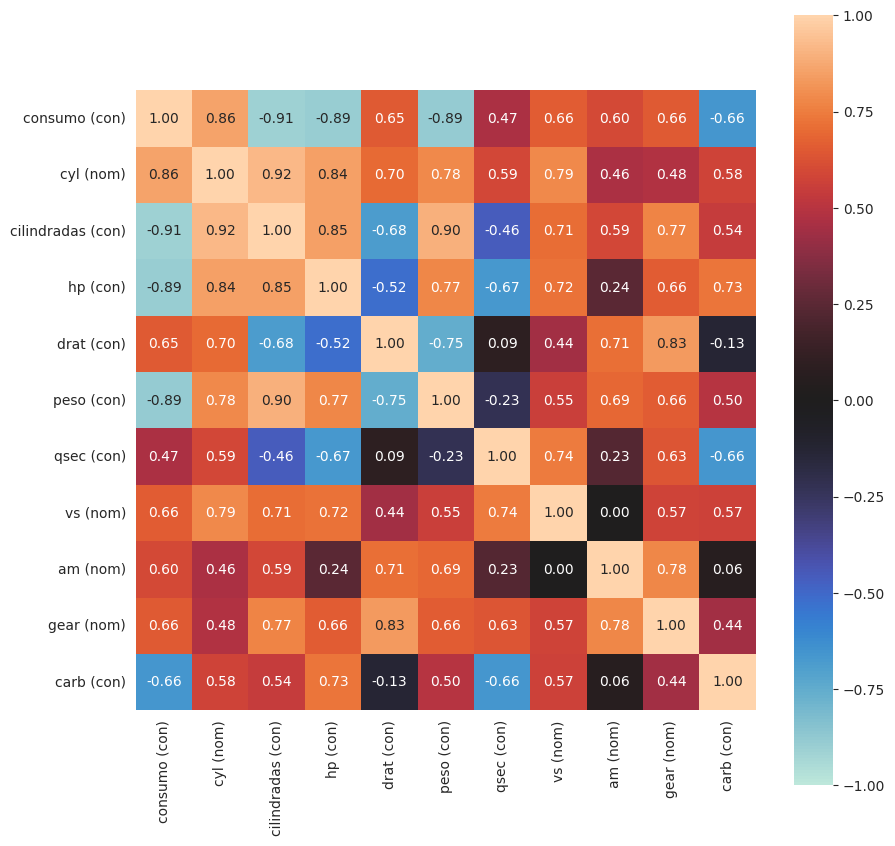

{'corr':                    consumo (con)  cyl (nom)  cilindradas (con)  hp (con)  \
consumo (con)           1.000000   0.855839          -0.908882 -0.894665   
cyl (nom)               0.855839   1.000000           0.915249  0.844910   
cilindradas (con)      -0.908882   0.915249           1.000000  0.851043   
hp (con)               -0.894665   0.844910           0.851043  1.000000   
drat (con)              0.651455   0.701757          -0.683592 -0.520125   
peso (con)             -0.886422   0.782571           0.897706  0.774677   
qsec (con)              0.466936   0.591266          -0.459782 -0.666606   
vs (nom)                0.664039   0.788946           0.710416  0.723097   
am (nom)                0.599832   0.464313           0.591227  0.243204   
gear (nom)              0.655095   0.481963           0.767118  0.663806   
carb (con)             -0.657498   0.577084           0.539778  0.733379   

                   drat (con)  peso (con)  qsec (con)  vs (nom)  am (nom)  \
c

In [ ]:
# Calcula a matriz de correlação
correlation_matrix = nominal.associations(df, figsize=(10,10), mark_columns=True, num_num_assoc='spearman')

# Mostra a matriz de correlação
print(correlation_matrix)

Vamos testar qual a combinação resulta em um modelo com a melhor AIC (Akaike Information Criterion), AIC penaliza a adição de variáveis.

In [ ]:
#vamos utilisar a metrica AIC para determinar a melhor combinação de variaveis

import statsmodels.formula.api as sm
import itertools # Import the itertools module


# Lista para armazenar os resultados de cada modelo
model_results = []

# Lista de todas as variáveis independentes
independent_variables = df.columns.drop('consumo')

# Loop para gerar todos os modelos possíveis
for i in range(1, len(independent_variables) + 1):
  for combination in itertools.combinations(independent_variables, i):
    formula = 'consumo ~ ' + ' + '.join(combination)
    model = sm.ols(formula, data=df).fit()
    model_results.append((formula, model.aic))

# Encontrar o modelo com o menor AIC
best_model_formula, min_aic = min(model_results, key=lambda x: x[1]) # acessamos o segundo valor
print(f"Melhor modelo: {best_model_formula}")
print(f"AIC: {min_aic}")

# Ajustar o modelo com a melhor combinação de variáveis
best_model = sm.ols(best_model_formula, data=df).fit()

# Imprimir os resultados do modelo
print(best_model.summary())


Melhor modelo: consumo ~ peso + qsec + am
AIC: 97.35673982520709
                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.21e-11
Time:                        20:23:28   Log-Likelihood:                -44.678
No. Observations:                  32   AIC:                             97.36
Df Residuals:                      28   BIC:                             103.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
# podemos testar outros modelos

formula='consumo ~ cilindradas + cyl'

model=sm.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.06e-09
Time:                        12:46:39   Log-Likelihood:                -52.192
No. Observations:                  32   AIC:                             110.4
Df Residuals:                      29   BIC:                             114.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.7309      1.082     13.609      

Acurácia do modelo KNN: 1.0
Previsão do número de cilindros para o novo carro: 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


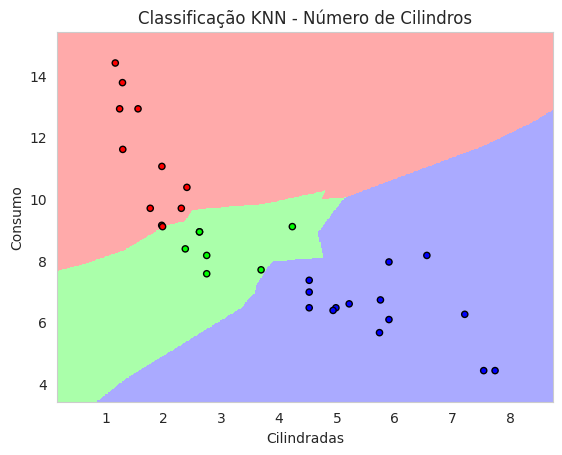

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# forlçantes (cilindradas e consumo) e o alvo (cyl)
X = df[['cilindradas', 'consumo']]
y = df['cyl']

# conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # número de vizinhos (n_neighbors)

# Treinar o modelo com os dados de treino
knn.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = knn.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo KNN: {accuracy}")

# Exemplo de previsão para um novo carro com cilindradas e consumo específicos
novo_carro = [[3.0, 15.0]]  # Substitua pelos valores de cilindradas e consumo do novo carro
num_cylinders_pred = knn.predict(novo_carro)
print(f"Previsão do número de cilindros para o novo carro: {num_cylinders_pred[0]}")

# Plotar os dados e as fronteiras de decisão (opcional)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Criar um mapa de cores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Criar uma grade de pontos para plotar as fronteiras de decisão
h = .02  # Tamanho da grade
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# previsão para cada ponto da grade
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#  fronteiras de decisão
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotar os pontos de dados
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Cilindradas')
plt.ylabel('Consumo')
plt.title('Classificação KNN - Número de Cilindros')
plt.show()
